# **Customer Churn Prediction**

**Objective:**

Customer churn prediction is a common problem in the telecommunication industry. It is important for companies to identify customers who are likely to churn in order to take preventive actions to retain them. Furthermore, it is beneficiary for companies to understand the factors that lead to customer churn. In this project, we will use machine learning models to predict customer churn based on a dataset from a telecommunication company.

**Table of Content:**

1. [Setup](#setup)

2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)

3. [Data Encoding & Imputation](#data-encoding--imputation)

4. [Correlation Analysis](#correlation-analysis)

5. [Handling Imbalanced Data & Scaling](#handling-imbalanced-data--scaling)

6. [Regression Models](#regression-models)

    - [Linear Regression](#linear-regression)

    - [Polynomial Regression](#polynomial-regression)

    - [Logistic Regression](#logistic-regression)

7. [K-Nearest Neighbors (kNN) Models](#k-nearest-neighbors-knn-models)

    - [Euclidean Distance](#euclidean-distance)

    - [Manhattan Distance](#manhattan-distance)

8. [Support Vector Machine (SVM) Models](#support-vector-machine-svm-model)

    - [Linear Kernel](#linear-svm)

    - [Non-Linear Kernel](#non-linear-svm)

9. [Random Forest Model](#random-forest-model)

10. [Boosting Models](#boosting-models)

    - [Gradient Boosting](#gradient-boosting-model)

    - [XGBoost](#xgboost-model)

    - [CatBoost](#catboost-model)

11. [App](#app)

## Setup

1. **Importing libraries**

In [84]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE

import pickle

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, precision_score, r2_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings('ignore')

2. **Importing the data**

In [3]:
df = pd.read_excel('data.xlsx', sheet_name='E Comm')
desc = pd.read_excel('data.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3]).drop(columns="Data")

3. **Description of the data columns**

In [4]:
desc

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


4. **Peaking the data**

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Exploratory Data Analysis (EDA)

1. **Analyzing the type of data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Seems like all the data are in appropriate format, no need to change the data type.

2. **Dropping `customerID` column**

We'll drop the `customerID` column as it is not useful for our analysis, nor is a feature for churn prediction.

In [7]:
df.drop(columns="CustomerID", inplace=True)

3. **Lets get the count of some interesting variables, to get an idea of what the data represents.**

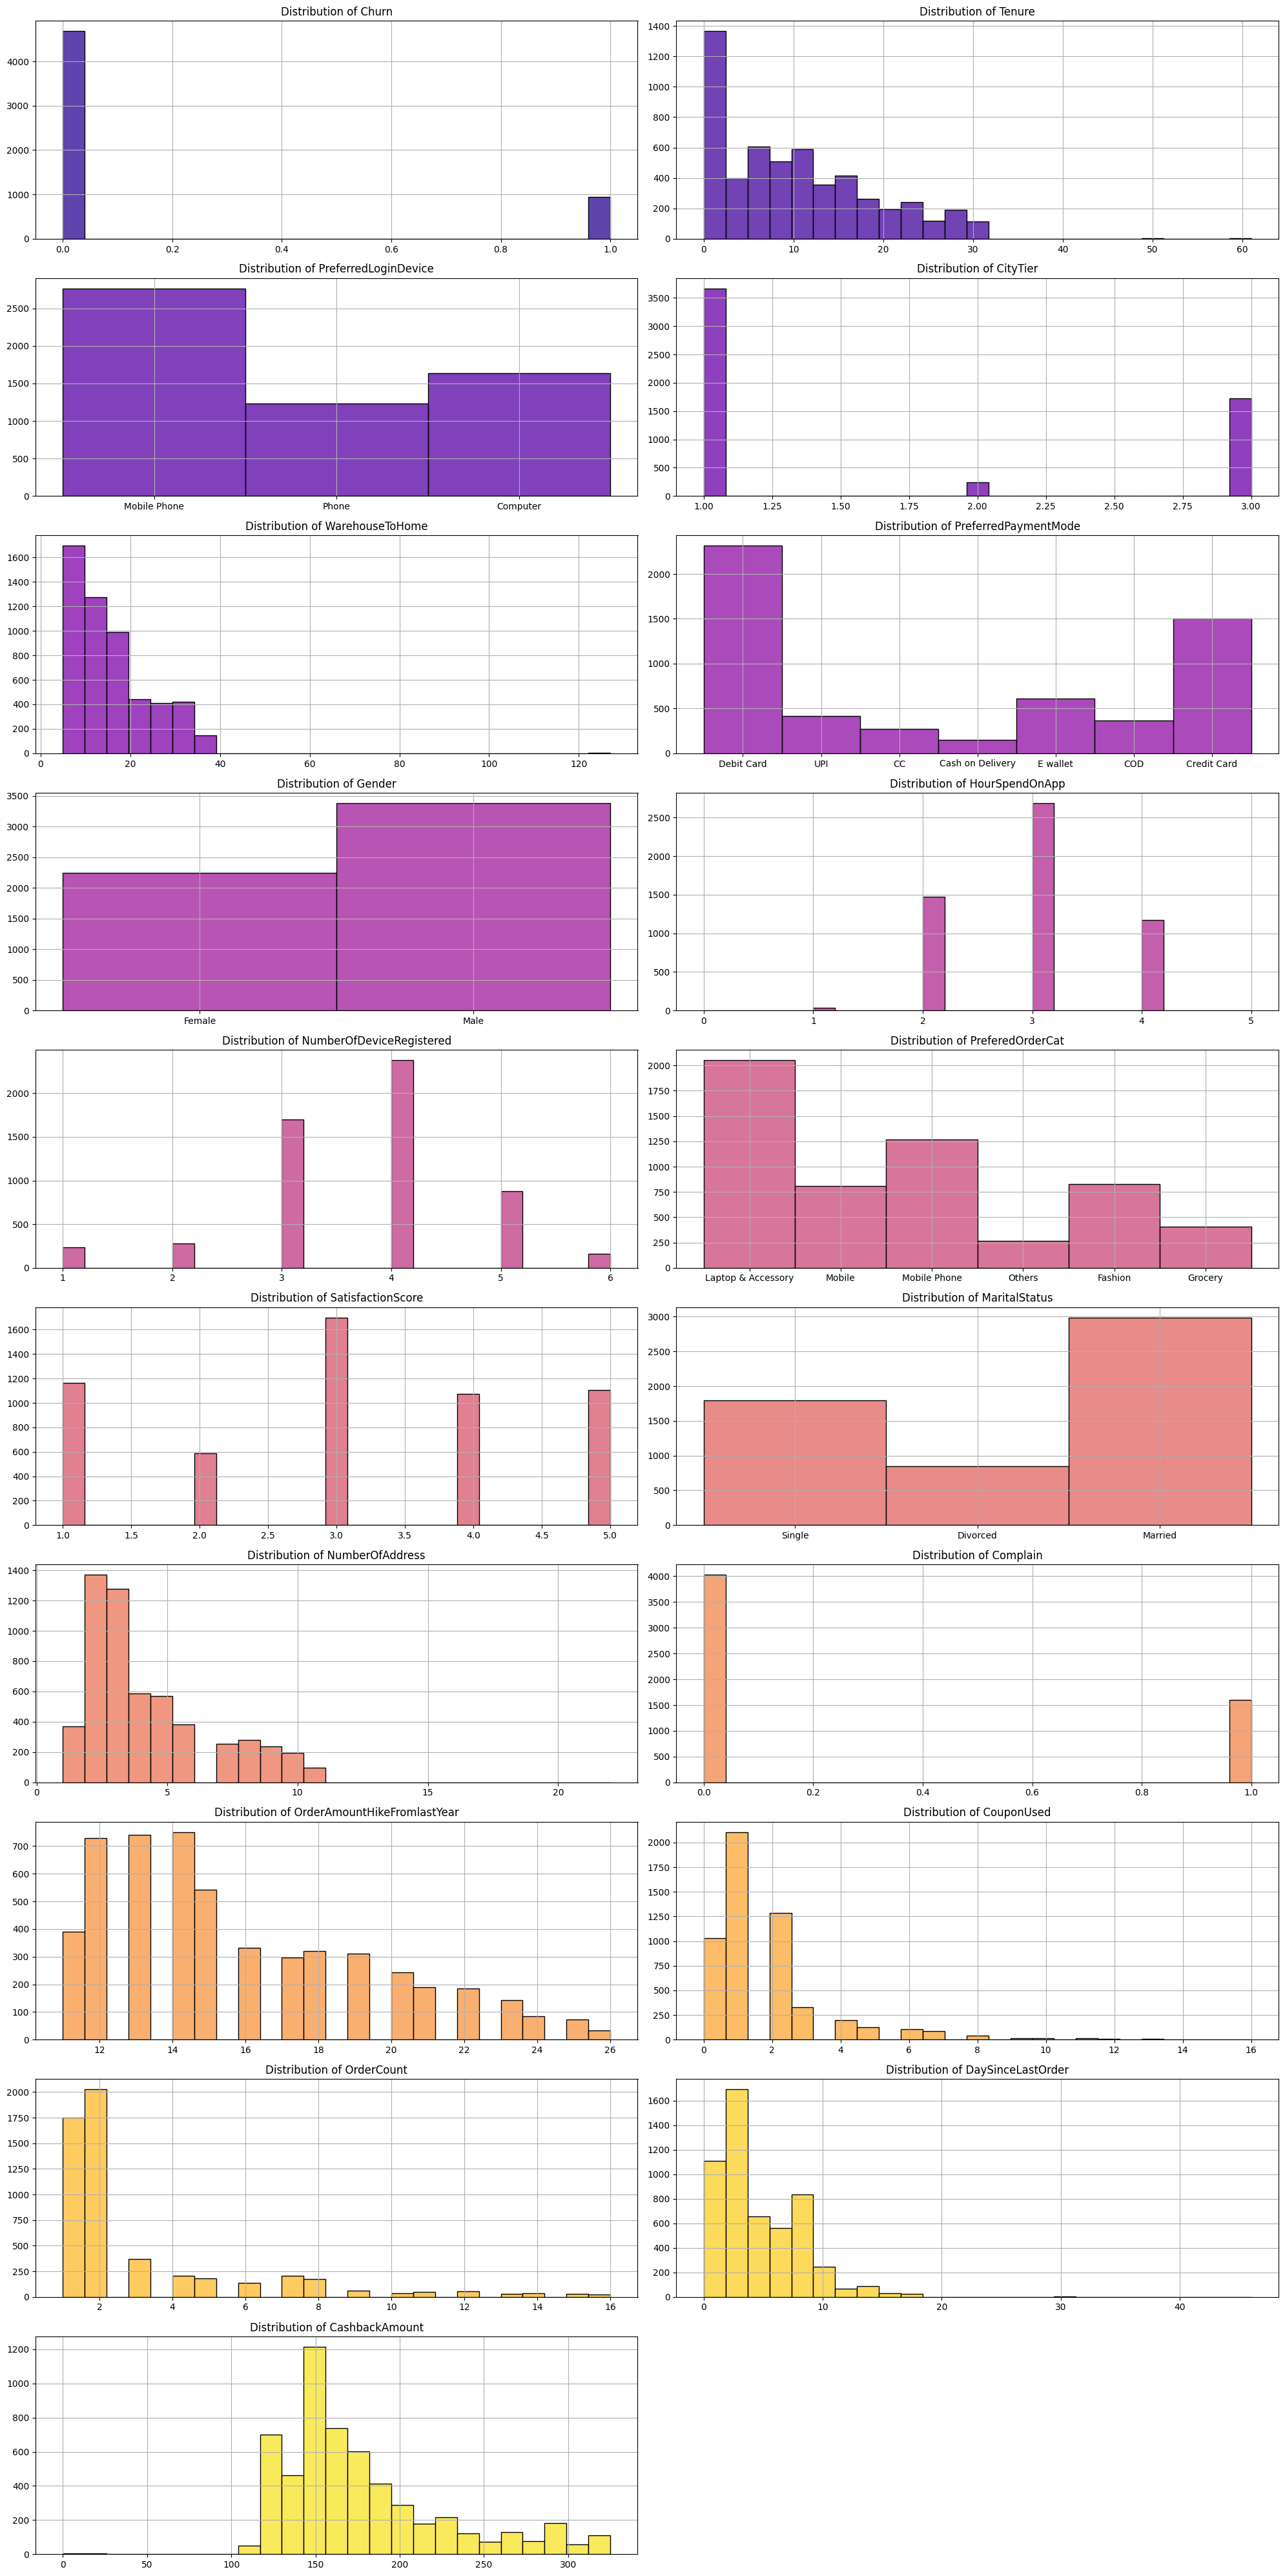

In [8]:
plt.figure(figsize=(20,40))
n = 1
colors = sns.color_palette("plasma", len(df.columns))
for i, col in enumerate(df.columns):
    plt.subplot(10,2,n)
    sns.histplot(df, x=col, bins=25, color=colors[i])
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(True)
    n += 1
    plt.tight_layout()

plt.show()

Here are a couple of important things these visualizations tell us:

- The data shows that the majority of customers do not churn, with only a smaller fraction leaving.

- There are fewer senior citizens than non-seniors, suggesting age might be a smaller but potentially significant factor.

- Tenure varies widely, with many customers having short tenure, which could indicate higher churn risk.

- Monthly charges are skewed, suggesting that a smaller subset of customers pay much higher fees.

- Total charges are also right-skewed, typically increasing with customer tenure.

- Certain internet service types and add-ons dominate, possibly influencing churn based on specific service preferences.

- Payment methods vary, with certain methods (like month-to-month) often linked to higher churn.

- Contract type, additional services, and senior citizen status stand out as potential predictors of churn.

- Outliers and missing values in total charges and other features may need special handling before modeling.

## Data Encoding & Imputation

1. **Checking for missing values**

In [9]:
print(f'Count of missing values in each column:\n\n{df.isnull().sum()}\n---')
print(f'Total missing: {df.isnull().sum().sum()}')
print(f'Total rows missing (at least one): {df[df.isnull().any(axis=1)].shape[0]}')
print(f'Percentage of missing values in db: {df.isnull().sum().sum() / df.shape[0] * 100:.2f}%')

Count of missing values in each column:

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64
---
Total missing: 1856
Total rows missing (at least one): 1856
Percentage of missing values in db: 32.97%


This shows that no one row has more than one missing value, which is actually a bad thing, as it implies if we drop all rows with missing values, we will lose aout 33% of our data.

So we need to impute the missing values. I'll use `simpleImputer` for numeric columns and `iterativeImputer` with a RandomForestRegressor for categorical columns.

2. **Imputing missing values for numeric columns**

In [10]:
numerics = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numerics] = SimpleImputer(strategy='mean').fit_transform(df[numerics])

3. **Encoding categorical columns (One-Hot Encoding)**

In [11]:
categoricals = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categoricals, drop_first=True)

4. **Imputing missing values for categorical columns**

In [12]:
rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=250), max_iter=10)
df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

5. **Displaying the imputed and encoded data**

In [13]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1.0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Correlation Analysis

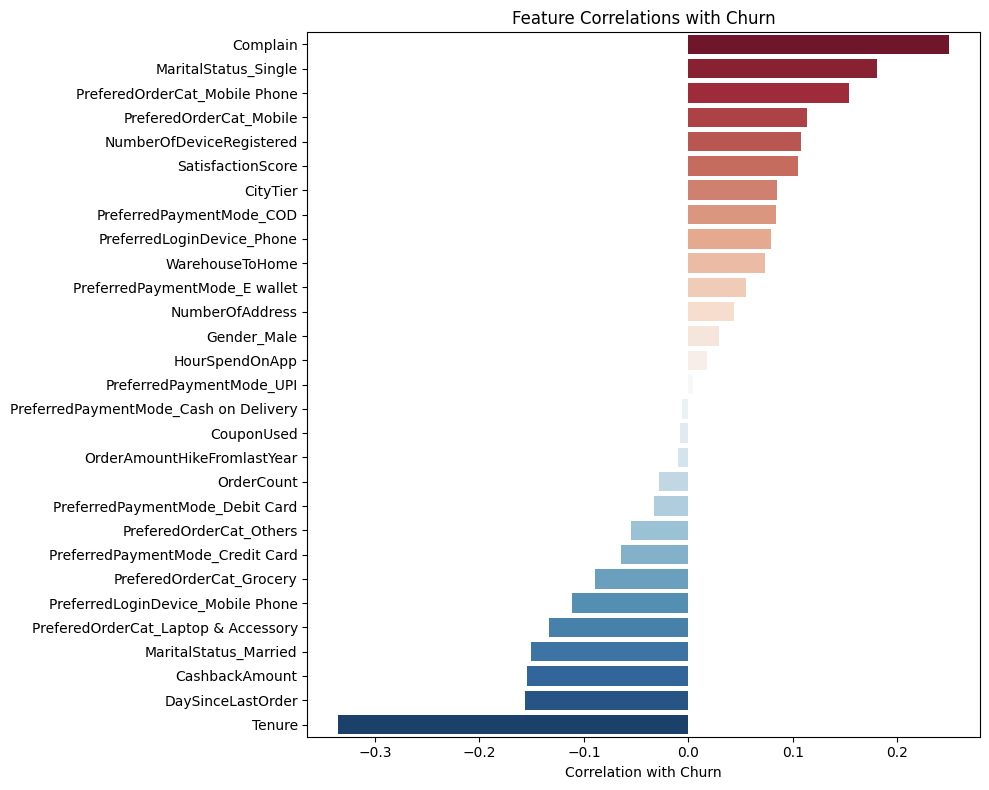

In [ ]:
churn_corr = df.corr()["Churn"].sort_values(ascending=False)
churn_corr = churn_corr.drop("Churn")

plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="RdBu")

plt.xlabel("Correlation with Churn")
plt.ylabel("")
plt.title("Feature Correlations with Churn")
plt.tight_layout()
plt.show()

This corrolation chart indicates:

- **Complain** has the highest positive correlation with churn, indicating that customers who lodge complaints are more likely to leave.

- **MaritalStatus_Single** also correlates positively with churn, suggesting single customers may have a higher tendency to churn.

- **PreferredOrderCat_Mobile** Phone shows a moderate positive correlation, implying those who primarily order mobile phones could be more prone to churn.

- **NumberOfDeviceRegistered** and **SatisfactionScore** both have moderate positive correlations, hinting that device usage and satisfaction levels relate to churn risk.

- **MaritalStatus_Married**, **CashbackAmount**, **DaySinceLastOrder**, and **Tenure** all show negative correlations, meaning married customers, those receiving higher cashback, and longer-term or more recently active customers are less likely to churn.

## Splitting Data

1. **Specifying the target variable (`y`) and the features (`X`)**

In [15]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

2. **Splitting the data into training and testing sets**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250, stratify=y)

print(f"Training set's shape: {X_train.shape}")
print(f"Testing set's shape: {X_test.shape}")

Training set's shape: (4504, 29)
Testing set's shape: (1126, 29)


## Handling Imbalanced Data & Scaling

1. **Evaluating the imbalance of `Churn`**

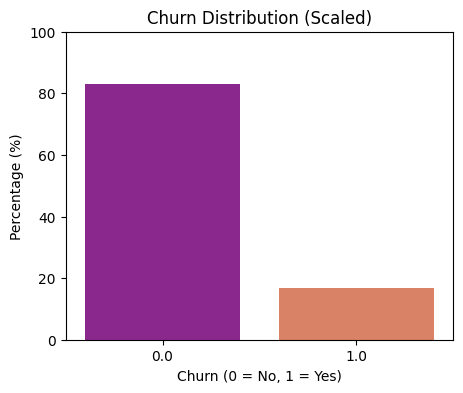

In [17]:
plt.figure(figsize=(5,4))

churn_percentages = df["Churn"].value_counts(normalize=True) * 100
ax = sns.barplot(x=churn_percentages.index, y=churn_percentages.values, palette="plasma")

plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Percentage (%)")
plt.title("Churn Distribution (Scaled)")
plt.ylim(0, 100)
plt.show()

This bar chart shows that our data is split 80/20 which is very imbalanced. This is very reasonable as it simply implies that most customers do not leave. But for our model to be able to predict the minority class, we need to balance the data. I will use `SMOTE` to oversample the minority class (1s).

2. **Handling the imbalance**

In [18]:
smote = SMOTE(random_state=250)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before upsampling:")
print('count of Churn = 0: {}'.format(sum(y_train==0)))
print('count of Churn = 1: {}'.format(sum(y_train==1)))
print(f"Training set's shape: {X_train.shape}\n")

print('After upsampling')
print('count of Churn = 0: {}'.format(sum(y_train_resampled==0)))
print('count of Churn = 1: {}'.format(sum(y_train_resampled==1)))
print(f"Training set's shape: {X_train_resampled.shape}")

Before upsampling:
count of Churn = 0: 3746
count of Churn = 1: 758
Training set's shape: (4504, 29)

After upsampling
count of Churn = 0: 3746
count of Churn = 1: 3746
Training set's shape: (7492, 29)


3. **Scaling the data**

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Regression Models

### **Linear Regression**

$$
y = \beta X + \epsilon
$$

1. **Performing Linear Regression**

In [20]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train_resampled)
y_pred_linear = model_linear.predict(X_test_scaled)

2. **Visualizing the model**

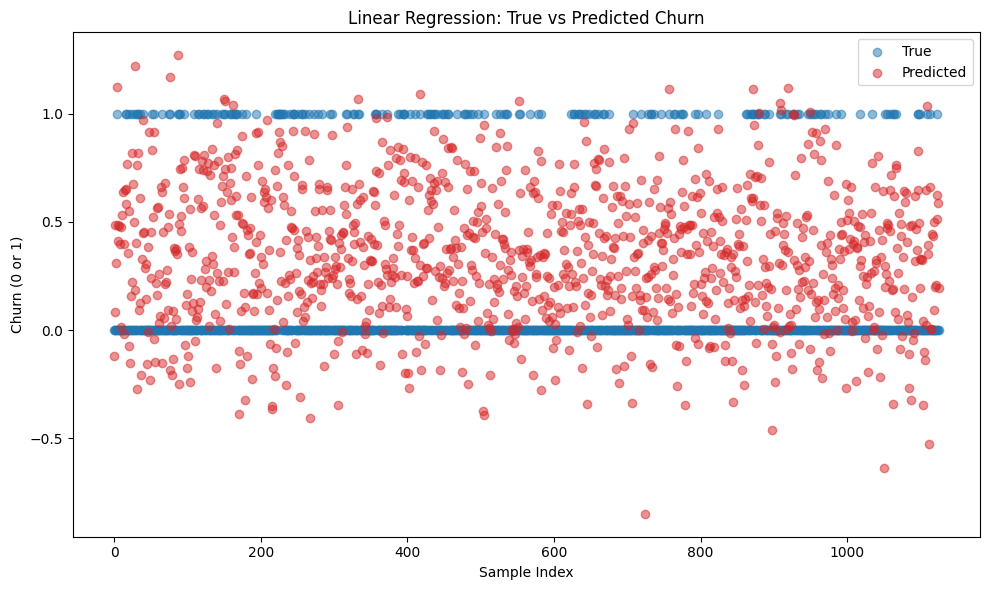

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='tab:blue', label='True', alpha=0.5)
plt.scatter(range(len(y_pred_linear)), y_pred_linear, color='tab:red', label='Predicted', alpha=0.5)
plt.title("Linear Regression: True vs Predicted Churn")
plt.xlabel("Sample Index")
plt.ylabel("Churn (0 or 1)")
plt.legend()
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [22]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Error Metrics: \n\nMSE: {mse_linear:.4f} \nR²: {r2_linear:.4f}")

Error Metrics: 

MSE: 0.1434 
R²: -0.0224


### **Polynomial Regression**


$$
y = \beta_0 + \beta_1 X + \beta_2 X^2 + \ldots + \beta_n X^n+ \epsilon
$$

1. **Calculating $X^2$**

In [23]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train_scaled)
X_test_poly2 = poly2.transform(X_test_scaled)

2. **Calculating $X^3$**

In [24]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train_scaled)
X_test_poly3 = poly3.transform(X_test_scaled)

3. **Performing Quadratic Regression**

In [25]:
model_quadratic = LinearRegression()
model_quadratic.fit(X_train_poly2, y_train_resampled)
y_pred_quadratic = model_quadratic.predict(X_test_poly2)

4. **Performing Cubic Regression**

In [26]:
model_cubic = LinearRegression()
model_cubic.fit(X_train_poly3, y_train_resampled)
y_pred_cubic = model_cubic.predict(X_test_poly3)

5. **Visualizing the model**

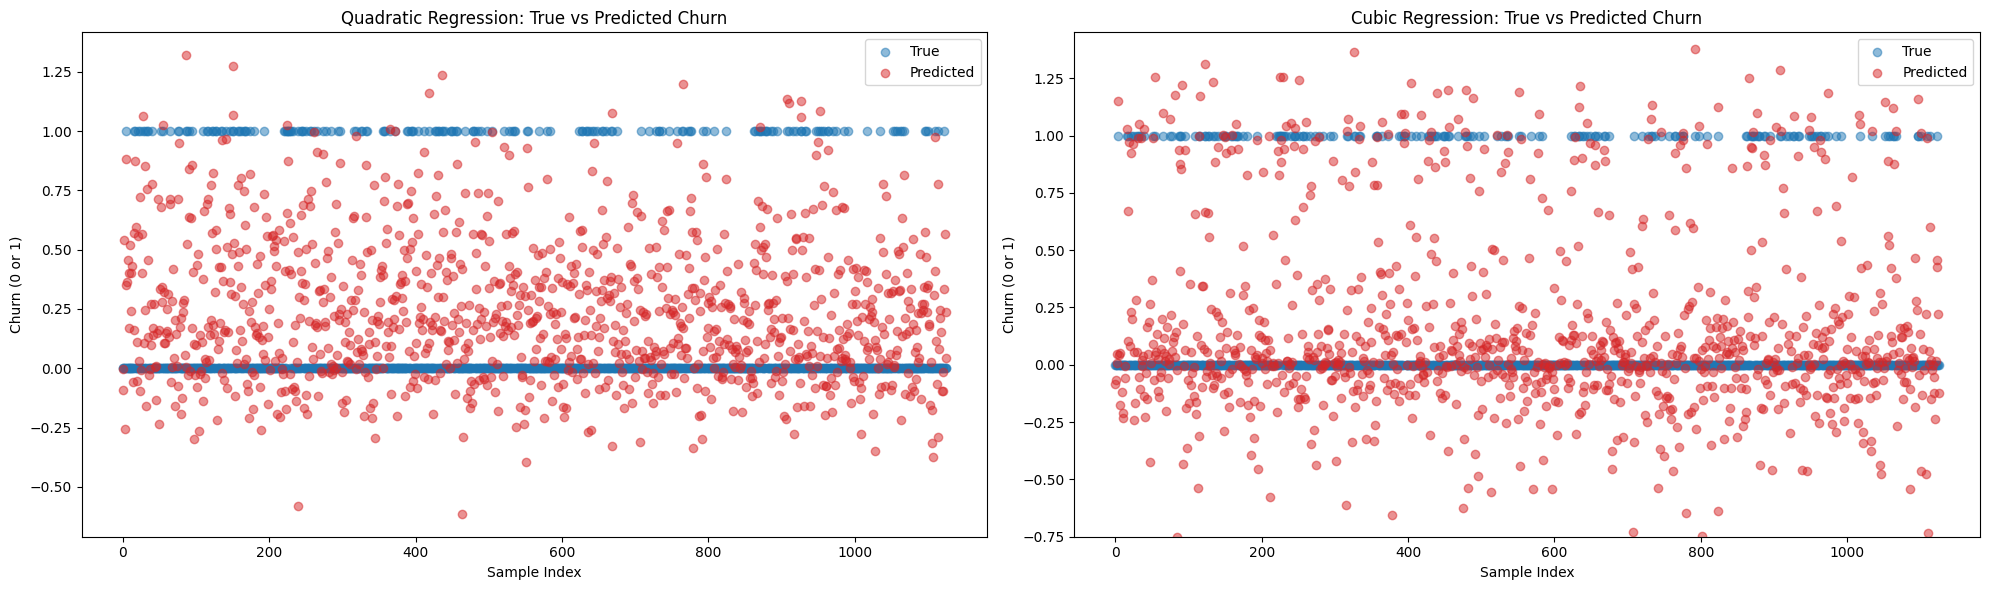

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.scatter(range(len(y_test)), y_test, color='tab:blue', label='True', alpha=0.5)
ax1.scatter(range(len(y_pred_quadratic)), y_pred_quadratic, color='tab:red', label='Predicted', alpha=0.5)
ax1.set_title("Quadratic Regression: True vs Predicted Churn")
ax1.set_xlabel("Sample Index")
ax1.set_ylabel("Churn (0 or 1)")
ax1.legend()

ax2.scatter(range(len(y_test)), y_test, color='tab:blue', label='True', alpha=0.5)
ax2.scatter(range(len(y_pred_cubic)), y_pred_cubic, color='tab:red', label='Predicted', alpha=0.5)
ax2.set_title("Cubic Regression: True vs Predicted Churn")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Churn (0 or 1)")
ax2.set_ylim(-0.75, 1.45)
ax2.legend()


plt.tight_layout()
plt.show()

### **Logistic Regression**

Logistic:

$$
\log(\frac{p}{1-p}) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
$$

Probability:

$$
p = \frac{1}{1 + e^{-\sum_{i=1}^{n} \beta_i X_i}}
$$

1. **Performing Logistic Regression**

In [28]:
model_logistic = LogisticRegression(random_state=250, max_iter=1000)
model_logistic.fit(X_train_scaled, y_train_resampled)

y_pred_logistic = model_logistic.predict(X_test_scaled)
y_pred_proba = model_logistic.predict_proba(X_test_scaled)[:, 1]

2. **Visualizing the model**

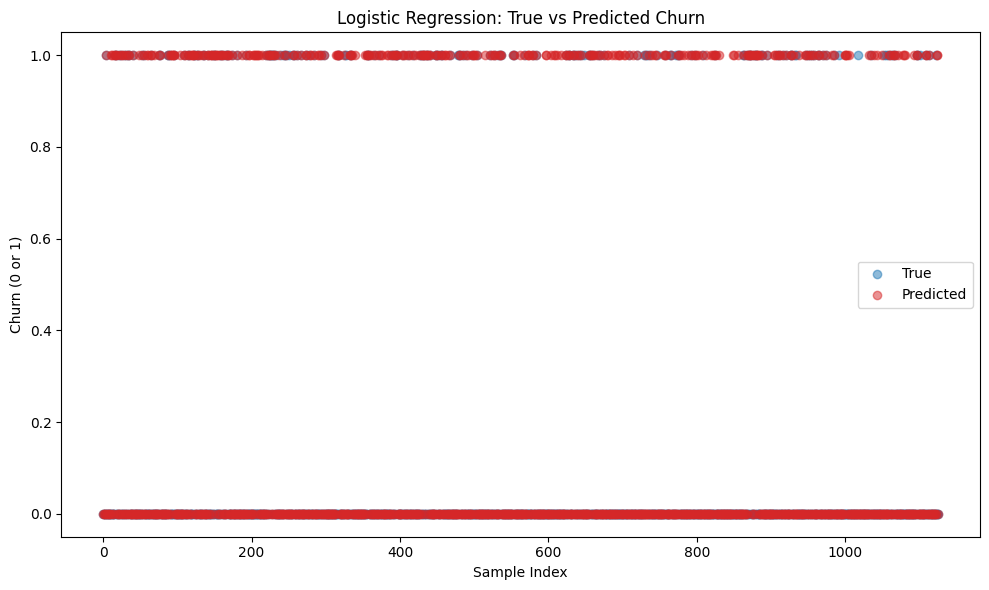

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='tab:blue', label='True', alpha=0.5)
plt.scatter(range(len(y_pred_logistic)), y_pred_logistic, color='tab:red', label='Predicted', alpha=0.5)
plt.title("Logistic Regression: True vs Predicted Churn")
plt.xlabel("Sample Index")
plt.ylabel("Churn (0 or 1)")
plt.legend()
plt.tight_layout()
plt.show()

3. **Performance**

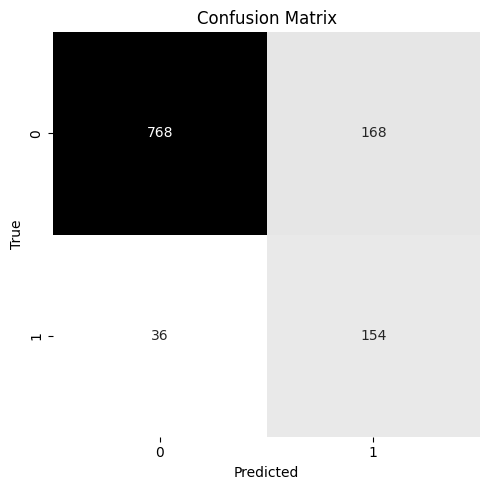

In [30]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

4. **Evaluating Error**

In [31]:
mse_logistic = mean_squared_error(y_test, y_pred_logistic)
r2_logistic = r2_score(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print(f"Error Metrics: \n\nMSE: {mse_logistic:.4}\nR^2: {r2_logistic:.4f}\n\nAccuracy: {accuracy_logistic:.4f}\nPrecision: {precision_logistic:.4f}\nRecall: {recall_logistic:.4f}\nF1: {f1_logistic:.4f}")

Error Metrics: 

MSE: 0.1812
R^2: -0.2916

Accuracy: 0.8188
Precision: 0.4783
Recall: 0.8105
F1: 0.6016


## K-Nearest Neighbors (kNN) Models

### **Euclidean Distance**

$$
d(x,y) = \sqrt{\sum_{i=1}^{n} (y_i - x_i)^2)}
 $$

1. **Performing Euclidean KNN**

In [32]:
model_euc_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_euc_knn.fit(X_train_scaled, y_train_resampled)
y_pred_euc_knn = model_euc_knn.predict(X_test_scaled)
y_pred_euc_knn_proba = model_euc_knn.predict_proba(X_test_scaled)[:, 1]

2. **Performance**

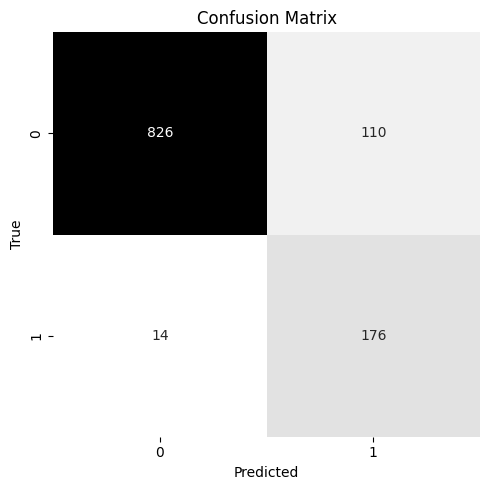

In [33]:
cm_euc_knn = confusion_matrix(y_test, y_pred_euc_knn)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_euc_knn, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [34]:
mse_euc_knn = mean_squared_error(y_test, y_pred_euc_knn)
r2_euc_knn = r2_score(y_test, y_pred_euc_knn)
accuracy_euc_knn = accuracy_score(y_test, y_pred_euc_knn)
precision_euc_knn = precision_score(y_test, y_pred_euc_knn)
recall_euc_knn = recall_score(y_test, y_pred_euc_knn)
f1_euc_knn = f1_score(y_test, y_pred_euc_knn)

print(f"Error Metrics: \n\nMSE: {mse_euc_knn:.4}\nR^2: {r2_euc_knn:.4f}\n\nAccuracy: {accuracy_euc_knn:.4f}\nPrecision: {precision_euc_knn:.4f}\nRecall: {recall_euc_knn:.4f}\nF1: {f1_euc_knn:.4f}")

Error Metrics: 

MSE: 0.1101
R^2: 0.2149

Accuracy: 0.8899
Precision: 0.6154
Recall: 0.9263
F1: 0.7395


### **Manhattan Distance**

$$
d(x,y) = \sum_{i=1}^{m} |x_i - y_i|
$$

1. **Performing Manhattan KNN**

In [35]:
model_man_knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
model_man_knn.fit(X_train_scaled, y_train_resampled)
y_pred_man_knn = model_man_knn.predict(X_test_scaled)
y_pred_man_knn_proba = model_man_knn.predict_proba(X_test_scaled)[:, 1]

2. **Performance**

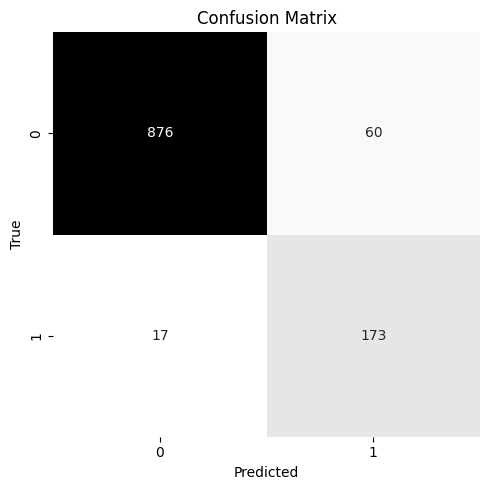

In [36]:
cm_man_knn = confusion_matrix(y_test, y_pred_man_knn)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_man_knn, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [37]:
mse_man_knn = mean_squared_error(y_test, y_pred_man_knn)
r2_man_knn = r2_score(y_test, y_pred_man_knn)
accuracy_man_knn = accuracy_score(y_test, y_pred_man_knn)
precision_man_knn = precision_score(y_test, y_pred_man_knn)
recall_man_knn = recall_score(y_test, y_pred_man_knn)
f1_man_knn = f1_score(y_test, y_pred_man_knn)

print(f"Error Metrics: \n\nMSE: {mse_man_knn:.4}\nR^2: {r2_man_knn:.4f}\n\nAccuracy: {accuracy_man_knn:.4f}\nPrecision: {precision_man_knn:.4f}\nRecall: {recall_man_knn:.4f}\nF1: {f1_man_knn:.4f}")

Error Metrics: 

MSE: 0.06838
R^2: 0.5125

Accuracy: 0.9316
Precision: 0.7425
Recall: 0.9105
F1: 0.8180


## Support Vector Machine (SVM) Model

### **Linear SVM**

$$
y = \text{sign} (w^T * x + b)
$$

1. **Performing SVM**

In [38]:
model_svc = SVC(kernel='linear', random_state=250, probability=True)
model_svc.fit(X_train_scaled, y_train_resampled)
y_pred_svc = model_svc.predict(X_test_scaled)
y_pred_svc_proba = model_svc.predict_proba(X_test_scaled)[:, 1]

2. **Performance**

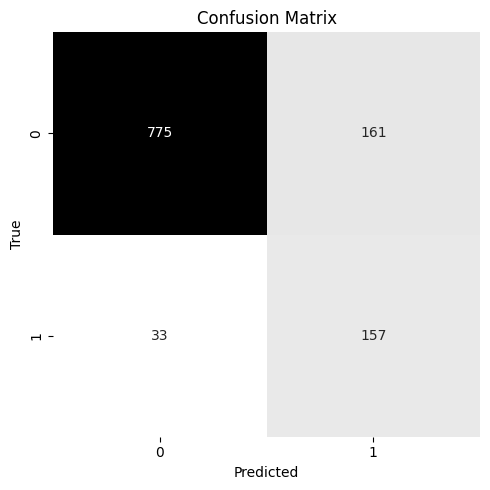

In [39]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [40]:
mse_svc = mean_squared_error(y_test, y_pred_svc)
r2_svc = r2_score(y_test, y_pred_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"Error Metrics: \n\nMSE: {mse_svc:.4}\nR^2: {r2_svc:.4f}\n\nAccuracy: {accuracy_svc:.4f}\nPrecision: {precision_svc:.4f}\nRecall: {recall_svc:.4f}\nF1: {f1_svc:.4f}")

Error Metrics: 

MSE: 0.1723
R^2: -0.2283

Accuracy: 0.8277
Precision: 0.4937
Recall: 0.8263
F1: 0.6181


### **Non-Linear SVM**

In [41]:
# non-linear kernel
model_rbf_svc = SVC(kernel='rbf', random_state=250, probability=True)
model_rbf_svc.fit(X_train_scaled, y_train_resampled)
y_pred_rbf_svc = model_rbf_svc.predict(X_test_scaled)
y_pred_rbf_svc_proba = model_rbf_svc.predict_proba(X_test_scaled)[:, 1]

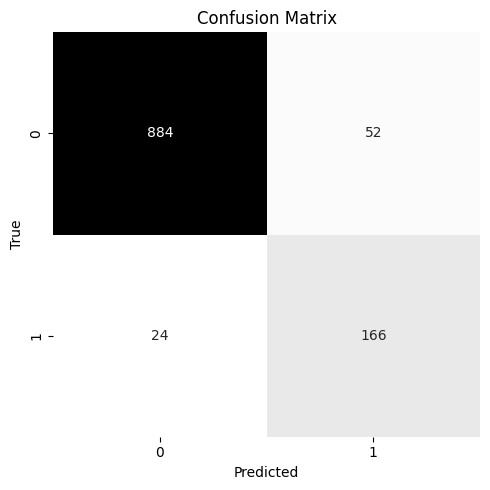

In [42]:
cm_rbf_svc = confusion_matrix(y_test, y_pred_rbf_svc)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_rbf_svc, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [43]:
mse_rbf_svc = mean_squared_error(y_test, y_pred_rbf_svc)
r2_rbf_svc = r2_score(y_test, y_pred_rbf_svc)
accuracy_rbf_svc = accuracy_score(y_test, y_pred_rbf_svc)
precision_rbf_svc = precision_score(y_test, y_pred_rbf_svc)
recall_rbf_svc = recall_score(y_test, y_pred_rbf_svc)
f1_rbf_svc = f1_score(y_test, y_pred_rbf_svc)

print(f"Error Metrics: \n\nMSE: {mse_rbf_svc:.4}\nR^2: {r2_rbf_svc:.4f}\n\nAccuracy: {accuracy_rbf_svc:.4f}\nPrecision: {precision_rbf_svc:.4f}\nRecall: {recall_rbf_svc:.4f}\nF1: {f1_rbf_svc:.4f}")

Error Metrics: 

MSE: 0.0675
R^2: 0.5188

Accuracy: 0.9325
Precision: 0.7615
Recall: 0.8737
F1: 0.8137


## Random Forest Model

1. **Performing Random Forest**

In [44]:
model_rf = RandomForestClassifier(random_state=250)
model_rf.fit(X_train_scaled, y_train_resampled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_rf_proba = model_rf.predict_proba(X_test_scaled)[:, 1]

2. **Performance**

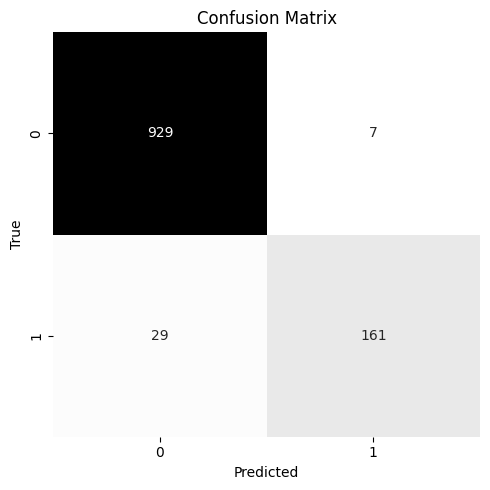

In [45]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [46]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Error Metrics: \n\nMSE: {mse_rf:.4}\nR^2: {r2_rf:.4f}\n\nAccuracy: {accuracy_rf:.4f}\nPrecision: {precision_rf:.4f}\nRecall: {recall_rf:.4f}\nF1: {f1_rf:.4f}")

Error Metrics: 

MSE: 0.03197
R^2: 0.7721

Accuracy: 0.9680
Precision: 0.9583
Recall: 0.8474
F1: 0.8994


## Boosting Models

### **Gradient Boosting Model**

1. **Performing Gradient Boosting**

In [47]:
model_gb = GradientBoostingClassifier(random_state=250)
model_gb.fit(X_train_scaled, y_train_resampled)
y_pred_gb = model_gb.predict(X_test_scaled)
y_pred_gb_proba = model_gb.predict_proba(X_test_scaled)[:, 1]

2. **Performance**

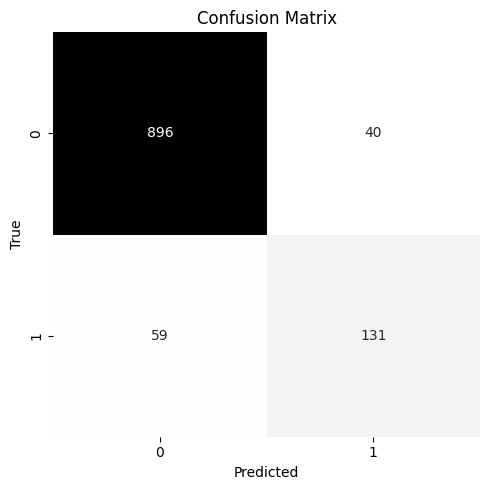

In [48]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [49]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Error Metrics: \n\nMSE: {mse_gb:.4}\nR^2: {r2_gb:.4f}\n\nAccuracy: {accuracy_gb:.4f}\nPrecision: {precision_gb:.4f}\nRecall: {recall_gb:.4f}\nF1: {f1_gb:.4f}")

Error Metrics: 

MSE: 0.08792
R^2: 0.3732

Accuracy: 0.9121
Precision: 0.7661
Recall: 0.6895
F1: 0.7258


### **XGBoost Model**

1. **Performing XGBoost**

In [50]:
model_xgb = XGBClassifier(random_state=250)
model_xgb.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_pred_xgb_proba = model_xgb.predict_proba(X_test_scaled)[:, 1]

2. **Performance**

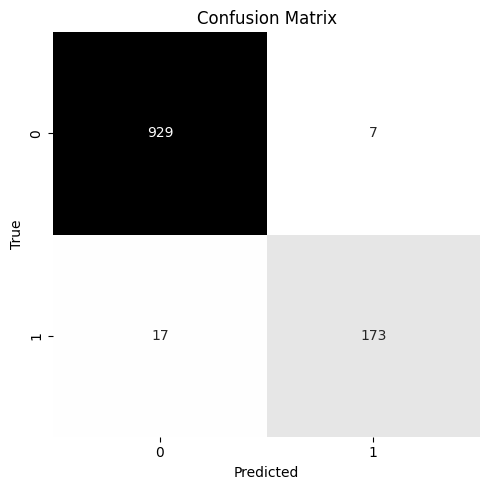

In [51]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [52]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Error Metrics: \n\nMSE: {mse_xgb:.4}\nR^2: {r2_xgb:.4f}\n\nAccuracy: {accuracy_xgb:.4f}\nPrecision: {precision_xgb:.4f}\nRecall: {recall_xgb:.4f}\nF1: {f1_xgb:.4f}")

Error Metrics: 

MSE: 0.02131
R^2: 0.8480

Accuracy: 0.9787
Precision: 0.9611
Recall: 0.9105
F1: 0.9351


### **CatBoost Model**

In [53]:
model_cat = CatBoostClassifier(random_seed=250, verbose=0)
model_cat.fit(X_train_scaled, y_train_resampled)
y_pred_cat = model_cat.predict(X_test_scaled)
y_pred_cat_proba = model_cat.predict_proba(X_test_scaled)[:, 1]

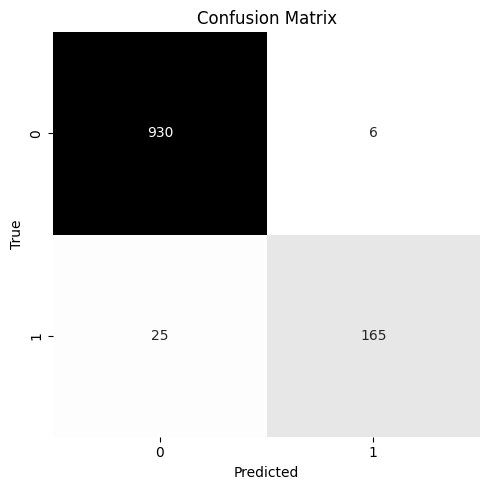

In [54]:
cm_cat = confusion_matrix(y_test, y_pred_cat)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [55]:
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)

print(f"Error Metrics: \n\nMSE: {mse_cat:.4}\nR^2: {r2_cat:.4f}\n\nAccuracy: {accuracy_cat:.4f}\nPrecision: {precision_cat:.4f}\nRecall: {recall_cat:.4f}\nF1: {f1_cat:.4f}")

Error Metrics: 

MSE: 0.02753
R^2: 0.8037

Accuracy: 0.9725
Precision: 0.9649
Recall: 0.8684
F1: 0.9141


## App

1. **Saving the best model**

In [58]:
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

2. **Saving the Scaler**

In [60]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

3. **Getting the medians of the columns, to set as default values**

In [93]:
df.median()

Churn                                      0.00
Tenure                                     9.00
CityTier                                   1.00
WarehouseToHome                           14.00
HourSpendOnApp                             3.00
NumberOfDeviceRegistered                   4.00
SatisfactionScore                          3.00
NumberOfAddress                            3.00
Complain                                   0.00
OrderAmountHikeFromlastYear               15.00
CouponUsed                                 1.00
OrderCount                                 2.00
DaySinceLastOrder                          4.00
CashbackAmount                           163.28
PreferredLoginDevice_Mobile Phone          0.00
PreferredLoginDevice_Phone                 0.00
PreferredPaymentMode_COD                   0.00
PreferredPaymentMode_Cash on Delivery      0.00
PreferredPaymentMode_Credit Card           0.00
PreferredPaymentMode_Debit Card            0.00
PreferredPaymentMode_E wallet           